<a href="https://colab.research.google.com/github/tomonari-masada/course2021-sml/blob/main/05_nearest_neighbors_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k近傍法 (2)

## 準備

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving lifesat.csv to lifesat.csv


{'lifesat.csv': b'Country,GDP per capita,Life satisfaction\nRussia,9054.914,6.0\nTurkey,9437.372,5.6\nHungary,12239.893999999998,4.9\nPoland,12495.333999999999,5.8\nSlovak Republic,15991.736,6.1\nEstonia,17288.083,5.6\nGreece,18064.288,4.8\nPortugal,19121.592,5.1\nSlovenia,20732.482,5.7\nSpain,25864.721,6.5\nKorea,27195.197,5.8\nItaly,29866.581000000002,6.0\nJapan,32485.545,5.9\nIsrael,35343.336,7.4\nNew Zealand,37044.891,7.3\nFrance,37675.006,6.5\nBelgium,40106.632000000005,6.9\nGermany,40996.511,7.0\nFinland,41973.988,7.4\nCanada,43331.960999999996,7.3\nNetherlands,43603.115,7.3\nAustria,43724.030999999995,6.9\nUnited Kingdom,43770.687999999995,6.8\nSweden,49866.265999999996,7.2\nIceland,50854.583,7.5\nAustralia,50961.865,7.3\nIreland,51350.744000000006,7.0\nDenmark,52114.165,7.5\nUnited States,55805.204000000005,7.2\n'}

## CSVファイルの読み込み

In [3]:
df = pd.read_csv('lifesat.csv', index_col=0)
print(f'shape: {df.shape}')

shape: (29, 2)


In [4]:
df.describe()

,GDP per capita,Life satisfaction
count,29.000000,29.000000
mean,33391.749138,6.493103
std,14650.076056,0.839613
min,9054.914000,4.800000
25%,19121.592000,5.800000
50%,37044.891000,6.800000
75%,43724.031000,7.300000
max,55805.204000,7.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


## k-近傍法による予測 (1)

### 問題設定
- 一人当たりのGDPから生活満足度を予測したい。
- 今回は、日本の生活満足度を予測するという設定。
- 一人当たりのGDPを使って日本の近傍を見つけ、その近傍の生活満足度を予測に利用する。
- 予測の良し悪しは、実際の値との差の二乗で評価。

### 散布図を描く
* この設定で予測することが妥当かどうかを確認。

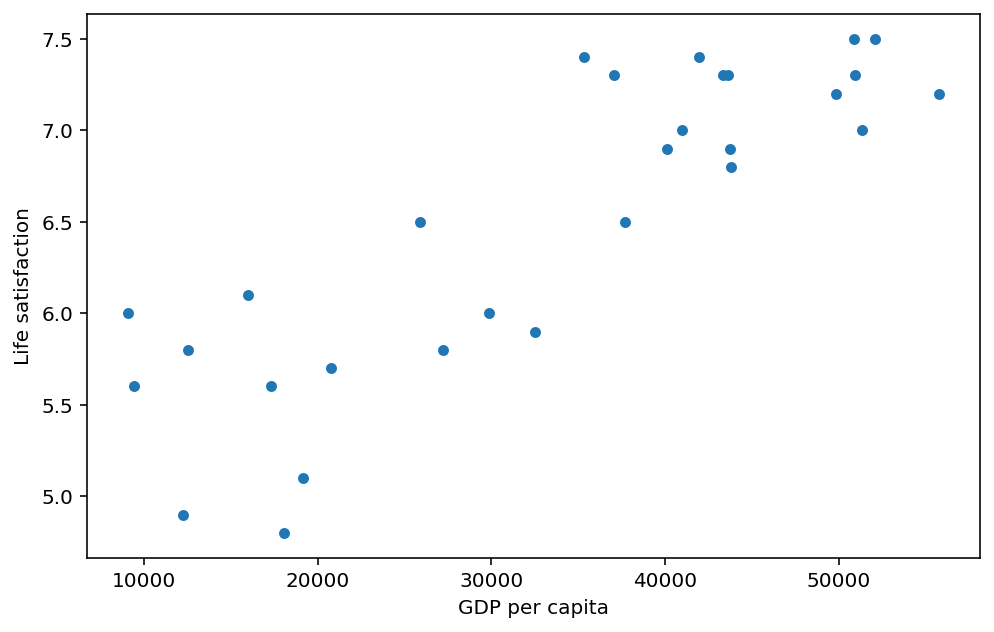

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax)

* 日本を除外する。

In [30]:
X = df.copy().drop('Japan')['GDP per capita'].to_numpy().reshape((1, -1))
y = df.copy().drop('Japan')['Life satisfaction'].to_numpy()

In [31]:
X.shape

(1, 28)

In [32]:
y.shape

(28,)

## k-近傍法による予測 (2)
* 全ての国について予測を行ってみる。
 * 最適なkは、国によってどのくらい違うものだろうか？

In [19]:
countries = df.index.tolist()

In [20]:
print(countries)

['Russia', 'Turkey', 'Hungary', 'Poland', 'Slovak Republic', 'Estonia', 'Greece', 'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan', 'Israel', 'New Zealand', 'France', 'Belgium', 'Germany', 'Finland', 'Canada', 'Netherlands', 'Austria', 'United Kingdom', 'Sweden', 'Iceland', 'Australia', 'Ireland', 'Denmark', 'United States']


In [33]:
X = dict()
y = dict()
for country in countries:
  X[country] = df.copy().drop(country)['GDP per capita'].to_numpy().reshape((1, -1))
  y[country] = df.copy().drop(country)['Life satisfaction'].to_numpy()

## 多変量を使った予測

In [35]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended.csv


{'lifesat_extended.csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,1223

In [36]:
df_multi = pd.read_csv('lifesat_extended.csv', index_col=0)

In [37]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              29 non-null     float64
 1   Assault rate                               29 non-null     float64
 2   Consultation on rule-making                29 non-null     float64
 3   Dwellings without basic facilities         29 non-null     float64
 4   Educational attainment                     29 non-null     float64
 5   Employees working very long hours          29 non-null     float64
 6   Employment rate                            29 non-null     float64
 7   Homicide rate                              29 non-null     float64
 8   Household net adjusted disposable income   29 non-null     float64
 9   Household net financial wealth             29 non-null     float64
 10  Housing expenditu

In [38]:
df_multi.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,19.241379,3.572414,7.248276,2.400000,77.103448,8.791724,65.896552,1.596552,24302.137931,42052.000000,20.827586,6.062069,79.975862,6.493103,4.032069,36606.551724,90.068966,1.682759,67.655172,500.931034,14.890345,70.965517,82.896552,17.727586,33391.749138
std,7.224241,1.545476,2.718406,3.801034,15.062595,8.278210,7.788934,2.443867,6133.657664,31325.680935,2.879347,2.937980,2.960774,0.839613,4.166358,11696.416895,4.795318,0.445669,15.625702,21.142258,0.551333,11.216960,10.624583,1.176829,14650.076056
min,9.000000,1.300000,2.500000,0.000000,34.000000,0.160000,49.000000,0.300000,14095.000000,3251.000000,11.000000,2.400000,70.200000,4.800000,0.010000,16919.000000,72.000000,0.900000,30.000000,462.000000,13.420000,52.000000,56.000000,15.800000,9054.914000
25%,13.000000,2.200000,5.100000,0.200000,73.000000,3.660000,60.000000,0.600000,19326.000000,18465.000000,20.000000,4.800000,80.100000,5.800000,1.370000,25503.000000,89.000000,1.400000,65.000000,487.000000,14.610000,64.000000,78.000000,16.800000,19121.592000
50%,18.000000,3.600000,7.100000,0.700000,82.000000,6.160000,67.000000,0.900000,23965.000000,43045.000000,21.000000,5.500000,81.000000,6.800000,2.370000,36354.000000,90.000000,1.700000,69.000000,500.000000,14.910000,69.000000,85.000000,17.600000,37044.891000
75%,24.000000,4.900000,10.300000,3.200000,88.000000,12.250000,72.000000,1.300000,28307.000000,54987.000000,22.000000,6.500000,81.800000,7.300000,5.100000,46911.000000,94.000000,1.900000,77.000000,516.000000,15.110000,77.000000,91.000000,18.600000,43724.031000
max,35.000000,6.600000,11.500000,15.100000,94.000000,40.860000,82.000000,12.800000,41355.000000,145769.000000,26.000000,17.800000,83.200000,7.500000,18.390000,56340.000000,96.000000,2.500000,90.000000,542.000000,16.060000,93.000000,97.000000,19.800000,55805.204000
